In [5]:
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
from PIL import Image
import os
import keras
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import tensorflow as tf

In [6]:
def load_data(image_dir, annotation_file):
    image_paths = []
    labels = []
    
    with open(annotation_file, 'r') as file:
        for line in file:
            parts = line.strip().split(' ')
            filename = parts[0]
            
            # Extract class label (last element after the bounding box coordinates)
            bbox_and_label = parts[1].split(',')
            class_label = int(bbox_and_label[-1])  # The class label is the last item
            
            image_paths.append(os.path.join(image_dir, filename))
            labels.append(class_label)
    
    # Convert to TensorFlow Dataset
    # Creates a TensorFlow Dataset object that contains the image paths and labels, which is necessary for batch processing in TensorFlow.
    dataset = tf.data.Dataset.from_tensor_slices((image_paths, labels))
    
    # Map each filename to the image data and resize it
    def process_path(file_path, label):
        img = tf.io.read_file(file_path)
        img = tf.image.decode_jpeg(img, channels=3)
        img = tf.image.resize(img, [224, 224])
        img = img / 255.0  # Normalize to [0, 1]
        return img, label
    
    dataset = dataset.map(process_path)
    dataset = dataset.shuffle(buffer_size=1000).batch(32).prefetch(buffer_size=tf.data.AUTOTUNE)
    return dataset

# Load datasets
train_dataset = load_data('dataset/train/', 'dataset/train/_annotations_clean.txt')
val_dataset = load_data('dataset/valid/', 'dataset/valid/_annotations.txt')
test_dataset = load_data('dataset/test/', 'dataset/test/_annotations.txt')


#### Building a model

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),  # Flatten the input image
    tf.keras.layers.Dense(128, activation='relu'),       # First hidden layer with 128 units
    tf.keras.layers.Dense(6, activation='softmax')       # Output layer with 6 units for 6 classes
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()
history = model.fit(train_dataset,epochs=15,validation_data=val_dataset)
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f'Test accuracy: {test_accuracy}')


C:\Users\shrut\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 150528)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │      19,267,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,268,486 (73.50 MB)

 Trainable params: 19,268,486 (73.50 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
374/374 ━━━━━━━━━━━━━━━━━━━━ 59s 149ms/step - accuracy: 0.4714 - loss: 12.6660 - val_accuracy: 0.7294 - val_loss: 1.0253
Epoch 2/15
374/374 ━━━━━━━━━━━━━━━━━━━━ 48s 127ms/step - accuracy: 0.6547 - loss: 1.4274 - val_accuracy: 0.7352 - val_loss: 1.0843
Epoch 3/15
374/374 ━━━━━━━━━━━━━━━━━━━━ 49s 128ms/step - accuracy: 0.6811 - loss: 1.3072 - val_accuracy: 0.6883 - val_loss: 0.9525
Epoch 4/15
374/374 ━━━━━━━━━━━━━━━━━━━━ 50s 131ms/step - accuracy: 0.7382 - loss: 0.8304 - val_accuracy: 0.7216 - val_loss: 0.7526
Epoch 5/15
374/374 ━━━━━━━━━━━━━━━━━━━━ 48s 127ms/step - accuracy: 0.7627 - loss: 0.7064 - val_accuracy: 0.7789 - val_loss: 0.6664
Epoch 6/15
374/374 ━━━━━━━━━━━━━━━━━━━━ 49s 128ms/step - accuracy: 0.7659 - loss: 0.6611 - val_accuracy: 0.7711 - val_loss: 0.7677
Epoch 7/15
374/374 ━━━━━━━━━━━━━━━━━━━━ 49s 128ms/step - accuracy: 0.7793 - loss: 0.6312 - val_accuracy: 0.8304 - val_loss: 0.5431
Epoch 8/15
374/374 ━━━━━━━━━━━━━━━━━━━━ 48s 126ms/step - accuracy: 0.7773 - loss: 

In [8]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 150528)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │      19,267,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 57,805,460 (220.51 MB)

 Trainable params: 19,268,486 (73.50 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 38,536,974 (147.01 MB)

In [9]:
train_loss, train_accuracy = model.evaluate(train_dataset)
print(f'Train accuracy: {train_accuracy}')

374/374 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - accuracy: 0.8113 - loss: 0.5065
Train accuracy: 0.8147807121276855


#### Analysing the accuracy

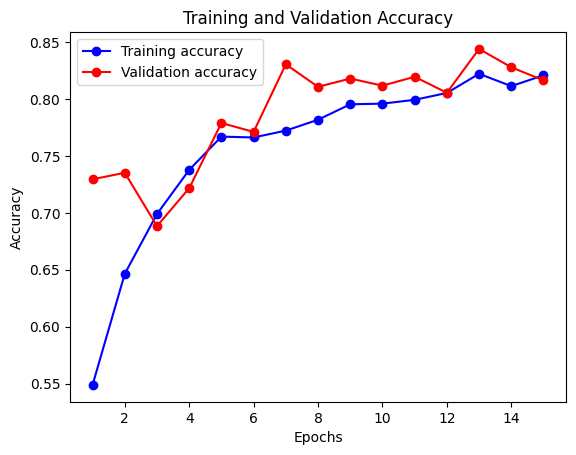

In [10]:
def plot_accuracy(history):
    # Extract accuracy and validation accuracy
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    
    # Extract number of epochs
    epochs = range(1, len(acc) + 1)
    
    # Plot training and validation accuracy
    plt.plot(epochs, acc, 'bo-', label='Training accuracy')
    plt.plot(epochs, val_acc, 'ro-', label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Call the function to plot accuracy
plot_accuracy(history)


In [15]:
y_pred = model.predict(test_dataset)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get the true labels from the test dataset
y_true = np.concatenate([y for x, y in test_dataset], axis=0)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
Confusion Matrix:
[[ 69  24   5 178  16   9]
 [ 41  22   3  72  10   4]
 [  7   1   0  17   0   0]
 [116  43   5 213  21  14]
 [ 24   7   0  36   2   0]
 [  8   0   0  15   3   0]]


31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


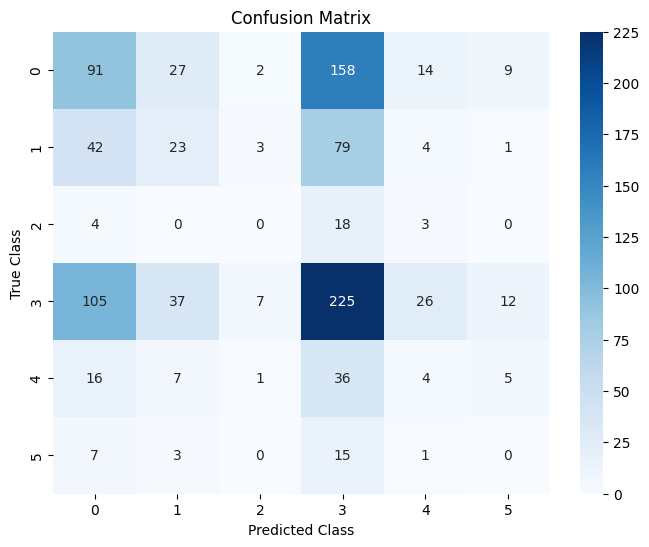

In [11]:

y_pred = model.predict(test_dataset)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get the true labels
y_true = np.concatenate([y for x, y in test_dataset], axis=0)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')
plt.show()

In [12]:
# print(classification_report(y_true, y_pred_classes))

              precision    recall  f1-score   support

           0       0.34      0.30      0.32       301
           1       0.24      0.15      0.18       152
           2       0.00      0.00      0.00        25
           3       0.42      0.55      0.48       412
           4       0.08      0.06      0.07        69
           5       0.00      0.00      0.00        26

    accuracy                           0.35       985
   macro avg       0.18      0.18      0.17       985
weighted avg       0.32      0.35      0.33       985



### Replacing Flatten with a convolutional neural network(CNN)

In [13]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3) , activation = 'relu', input_shape=(224,224,3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    tf.keras.layers.Conv2D(128,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

model1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model1.summary()

C:\Users\shrut\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,734 (42.61 MB)

 Trainable params: 11,169,734 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True) #avoid overfitting
history1 = model1.fit(train_dataset,epochs=10, validation_data=val_dataset, callbacks=[early_stopping])
test_loss1, test_accuracy1 = model1.evaluate(test_dataset)
print(f'Test accuracy for model 1: {test_accuracy1}')

Epoch 1/10
374/374 ━━━━━━━━━━━━━━━━━━━━ 296s 782ms/step - accuracy: 0.5830 - loss: 1.1242 - val_accuracy: 0.8111 - val_loss: 0.5602
Epoch 2/10
374/374 ━━━━━━━━━━━━━━━━━━━━ 288s 767ms/step - accuracy: 0.8289 - loss: 0.4812 - val_accuracy: 0.8283 - val_loss: 0.4683
Epoch 3/10
374/374 ━━━━━━━━━━━━━━━━━━━━ 294s 784ms/step - accuracy: 0.8810 - loss: 0.3399 - val_accuracy: 0.8486 - val_loss: 0.4600
Epoch 4/10
374/374 ━━━━━━━━━━━━━━━━━━━━ 299s 797ms/step - accuracy: 0.9076 - loss: 0.2547 - val_accuracy: 0.8803 - val_loss: 0.3542
Epoch 5/10
374/374 ━━━━━━━━━━━━━━━━━━━━ 299s 797ms/step - accuracy: 0.9248 - loss: 0.2022 - val_accuracy: 0.8933 - val_loss: 0.3536
Epoch 6/10
374/374 ━━━━━━━━━━━━━━━━━━━━ 296s 789ms/step - accuracy: 0.9476 - loss: 0.1515 - val_accuracy: 0.9011 - val_loss: 0.3756
Epoch 7/10
374/374 ━━━━━━━━━━━━━━━━━━━━ 296s 789ms/step - accuracy: 0.9562 - loss: 0.1254 - val_accuracy: 0.9043 - val_loss: 0.3438
Epoch 8/10
374/374 ━━━━━━━━━━━━━━━━━━━━ 303s 809ms/step - accuracy: 0.9614 -